# Par-Rate Bumps for Libor Curves
Investigate the impact of a par rate bump (bump to a curve benchmark used in curve building) on the curve

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [13]:
from financepy.utils import *
from financepy.products.rates import *
from financepy.products.rates.ibor_single_curve_par_shocker import IborSingleCurveParShocker

In [14]:
valuation_date = Date(6, 10, 2001)
cal = CalendarTypes.UNITED_KINGDOM

### Instruments

In [15]:
depoDCCType = DayCountTypes.ACT_360
depos = []
spot_days = 2
settlement_date = valuation_date.add_weekdays(spot_days)
depo = IborDeposit(settlement_date, "3M", 4.2/100.0, depoDCCType, cal_type=cal)
depos.append(depo)

fraDCCType = DayCountTypes.ACT_360
fras = []
fra = IborFRA(settlement_date.add_tenor("3M"), "3M", 4.20/100.0, fraDCCType, cal_type=cal)
fras.append(fra)

swaps = []
swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.THIRTY_E_360_ISDA
fixed_freqType = FrequencyTypes.SEMI_ANNUAL

swap = IborSwap(settlement_date, "1Y", swapType, 4.20/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "2Y", swapType, 4.30/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "3Y", swapType, 4.70/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "5Y", swapType, 5.40/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "7Y", swapType, 5.70/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "10Y", swapType, 6.00/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "12Y", swapType, 6.10/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "15Y", swapType, 5.90/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "20Y", swapType, 5.60/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)
swap = IborSwap(settlement_date, "25Y", swapType, 5.55/100.0, fixed_freqType, fixedDCCType, cal_type=cal)
swaps.append(swap)

Build curves using different interpolations

In [16]:
check_refit = True
iborCurves = {}
iborCurveShockers = {}
optional_interp_params = {'sigma' : 0.01} # only relevant for interp_type == InterpTypes.TENSION_ZERO_RATES

interp_types_to_use = {
    'FF':(InterpTypes.FLAT_FWD_RATES,{}), 
    'LF':(InterpTypes.LINEAR_FWD_RATES,{}), 
    'LZ':(InterpTypes.LINEAR_ZERO_RATES,{}), 
    'CZ':(InterpTypes.NATCUBIC_ZERO_RATES,{}),
    'TZ1':(InterpTypes.TENSION_ZERO_RATES,{'sigma' : 0.1}),
    'TZ2':(InterpTypes.TENSION_ZERO_RATES,{'sigma' : 2.0}),
    'TZ3':(InterpTypes.TENSION_ZERO_RATES,{'sigma' : 10.0}),
}

for key, interp_type in interp_types_to_use.items():
    print('Processing:', key, interp_type[0])
    iborCurve = IborSingleCurve(valuation_date, depos, fras, swaps, interp_type[0], check_refit=check_refit, **interp_type[1])
    iborCurves[key] = iborCurve
    curveShocker = IborSingleCurveParShocker(iborCurve)
    iborCurveShockers[key] = curveShocker


Processing: FF InterpTypes.FLAT_FWD_RATES
Processing: LF InterpTypes.LINEAR_FWD_RATES
Processing: LZ InterpTypes.LINEAR_ZERO_RATES
Processing: CZ InterpTypes.NATCUBIC_ZERO_RATES
Processing: TZ1 InterpTypes.TENSION_ZERO_RATES
Processing: TZ2 InterpTypes.TENSION_ZERO_RATES
Processing: TZ3 InterpTypes.TENSION_ZERO_RATES


### Look at the benchmark report for one of the curves
(they all have the same benchmarks)


In [17]:
# Print DataFrames in full
pd.set_option('display.max_rows', None,
                    'display.max_columns', None,
                    'display.float_format', lambda x:f'{x:.4f}'
                    )

In [18]:
# examine the last fit_report
df_br = curveShocker.benchmarks_report()
df_br

,type,start_date,maturity_date,day_count_type,notional,contract_rate,market_rate,spot_pvbp,fwd_pvbp,unit_value,value,fixed_leg_type,fixed_freq_type,benchmark_objects
0,IborDeposit,06-OCT-2001,09-OCT-2001,ACT_360,100.0000,0.0420,0.0420,0.0083,0.0083,1.0000,100.0000,NaN,NaN,OBJECT TYPE: IborDeposit\nSTART DATE: 06-OCT-2...
1,IborDeposit,09-OCT-2001,09-JAN-2002,ACT_360,100.0000,0.0420,0.0420,0.2528,0.2528,1.0000,100.0000,NaN,NaN,OBJECT TYPE: IborDeposit\nSTART DATE: 09-OCT-2...
2,IborFRA,09-JAN-2002,09-APR-2002,ACT_360,100.0000,0.0420,0.0420,0.2447,0.2474,0.0000,-0.0000,PAY,NaN,OBJECT TYPE: IborFRA\nSTART ACCD DATE: 09-JAN-...
3,IborSwap,09-OCT-2001,09-OCT-2002,THIRTY_E_360_ISDA,1000000,0.0420,0.0420,0.9689,0.9692,0.0000,0.0000,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
4,IborSwap,09-OCT-2001,09-OCT-2003,THIRTY_E_360_ISDA,1000000,0.0430,0.0430,1.8973,1.8980,0.0000,0.0000,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
5,IborSwap,09-OCT-2001,11-OCT-2004,THIRTY_E_360_ISDA,1000000,0.0470,0.0470,2.7837,2.7847,0.0000,0.0000,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
6,IborSwap,09-OCT-2001,09-OCT-2006,THIRTY_E_360_ISDA,1000000,0.0540,0.0540,4.3857,4.3873,0.0000,0.0003,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
7,IborSwap,09-OCT-2001,09-OCT-2008,THIRTY_E_360_ISDA,1000000,0.0570,0.0570,5.7938,5.7958,0.0000,0.0004,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
8,IborSwap,09-OCT-2001,10-OCT-2011,THIRTY_E_360_ISDA,1000000,0.0600,0.0600,7.5820,7.5847,0.0000,0.0008,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
9,IborSwap,09-OCT-2001,09-OCT-2013,THIRTY_E_360_ISDA,1000000,0.0610,0.0610,8.5828,8.5858,0.0000,0.0020,PAY,SEMI_ANNUAL,OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...


### Choose the benchmark to bump and apply the bump

In [19]:
par_rate_bump = 1*0.0001
benchmark_idx =7
print(df_br.loc[benchmark_idx])
bumpedCurves = {}
for key, shocker in iborCurveShockers.items():
    print('Processing:', key)
    bumpedCurve = shocker.apply_bump_to_benchmark(benchmark_idx, par_rate_bump)
    bumpedCurves[key] = bumpedCurve

type                                                          IborSwap
start_date                                                 09-OCT-2001
maturity_date                                              09-OCT-2008
day_count_type                                       THIRTY_E_360_ISDA
notional                                                       1000000
contract_rate                                                   0.0570
market_rate                                                     0.0570
spot_pvbp                                                       5.7938
fwd_pvbp                                                        5.7958
unit_value                                                      0.0000
value                                                           0.0004
fixed_leg_type                                                     PAY
fixed_freq_type                                            SEMI_ANNUAL
benchmark_objects    OBJECT TYPE: IborSwap\nOBJECT TYPE: SwapFixedL...
Name: 

### Curve Shape Analysis

Check instantaneous (ON) forward rates and see how they are affected by the par rate bump
We are looking how 'local' are the changes in fwd rates -- the further they extend beyond benchmarks
near the bumped one, the less local the bump and, generally, less financially justifyable the interpolation scheme

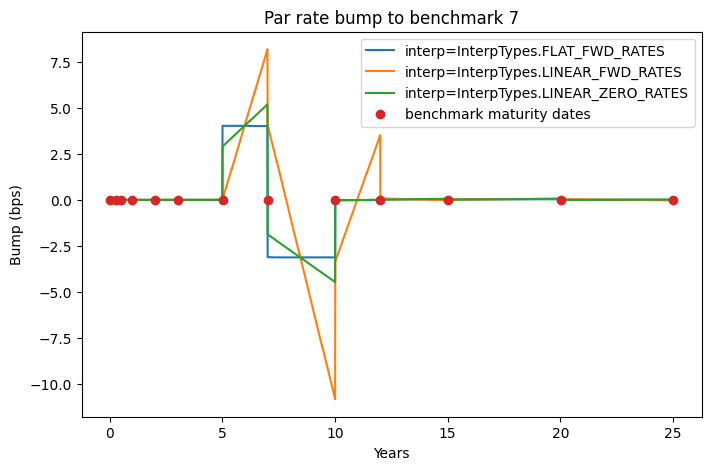

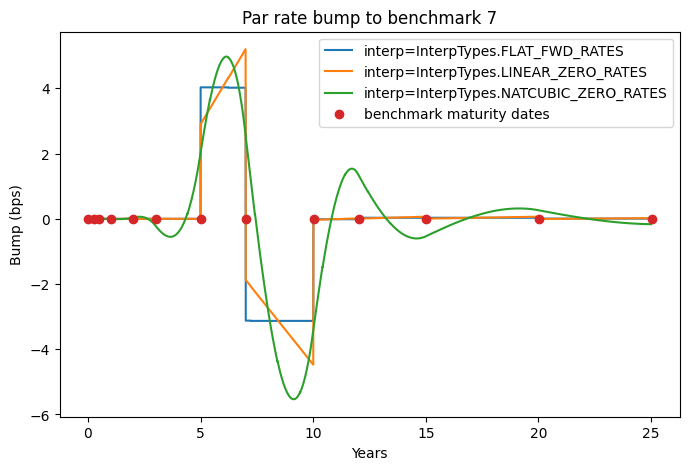

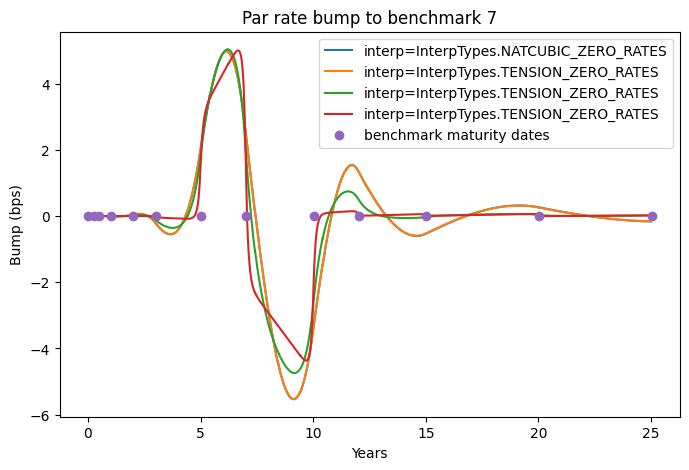

In [20]:
# %matplotlib widget
years = np.linspace(1./365, 25, 25*365)
plotDates = settlement_date.add_years(years)
benchmark_years = (df_br['maturity_date'] - valuation_date)/g_days_in_year

keys_to_plot_collections = [['FF', 'LF', 'LZ'], ['FF', 'LZ', 'CZ'], ['CZ', 'TZ1', 'TZ2', 'TZ3']]
for keys_to_plot in keys_to_plot_collections:
    plt.figure(figsize=(8,5))
    for key in keys_to_plot:

        baseCurve = iborCurves[key]
        bumpedCurve = bumpedCurves[key]
        baseFwdRates  = baseCurve.fwd(plotDates)   
        bumpedFwdRates = bumpedCurve.fwd(plotDates)   
        plt.plot(years, (bumpedFwdRates-baseFwdRates)*10000.0, label=f"interp={interp_types_to_use[key][0]}")

    plt.plot(benchmark_years, [0]*len(benchmark_years), 'o', label = 'benchmark maturity dates')
    plt.title(f'Par rate bump to benchmark {benchmark_idx}')
    plt.xlabel("Years")
    plt.ylabel("Bump (bps)")
    plt.legend(loc = 'best')
    plt.show()